In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
x=pd.read_csv("Social_Network_Ads.csv")

In [9]:
x.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
x=x.drop("User ID",axis=1)

In [14]:
X=x.drop("Purchased",axis=1)
Y=x[["Purchased"]]

In [18]:
cols=[ 'Age', 'EstimatedSalary']
X[cols]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [20]:
scaler=StandardScaler()
scaler.fit(X[cols])
X[cols]=scaler.transform(X[cols])

In [22]:
from  sklearn.preprocessing import LabelEncoder 

In [23]:
LE=LabelEncoder()
LE.fit(X["Gender"])

LabelEncoder()

In [24]:
X["Gender"]=LE.transform(X["Gender"])

In [25]:
X

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.3)
x_train.shape

(280, 3)

In [28]:
x_test.shape

(120, 3)

In [29]:
LGG=LogisticRegression()
LGG.fit(x_train,y_train)


E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [30]:
yhat=LGG.predict(x_test)

In [31]:
print(accuracy_score(y_test,yhat))

0.8083333333333333


In [33]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.79      0.71      0.75        48

    accuracy                           0.81       120
   macro avg       0.80      0.79      0.80       120
weighted avg       0.81      0.81      0.81       120



In [35]:
cm=confusion_matrix(y_test,yhat)

In [39]:
vals=pd.DataFrame(cm,columns=[i for i  in ["0","1"]],index=[i for i in ["Predicted-0","Predicted-1"]])

<AxesSubplot:>

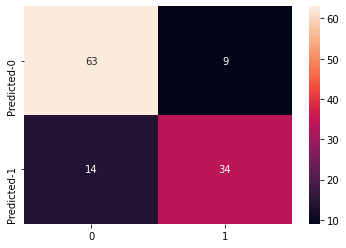

In [44]:
import seaborn as sns

sns.heatmap(vals,annot=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
data=pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [32]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [33]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

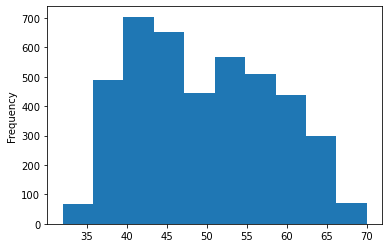

In [34]:
data.age.plot(kind="hist")

In [38]:
data.dropna(inplace=True)

In [39]:
data.education.isna().sum()

0

In [42]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# EDA

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

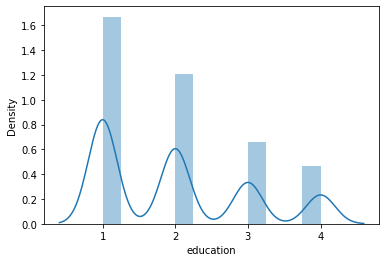

In [44]:
sns.distplot(data['education'])

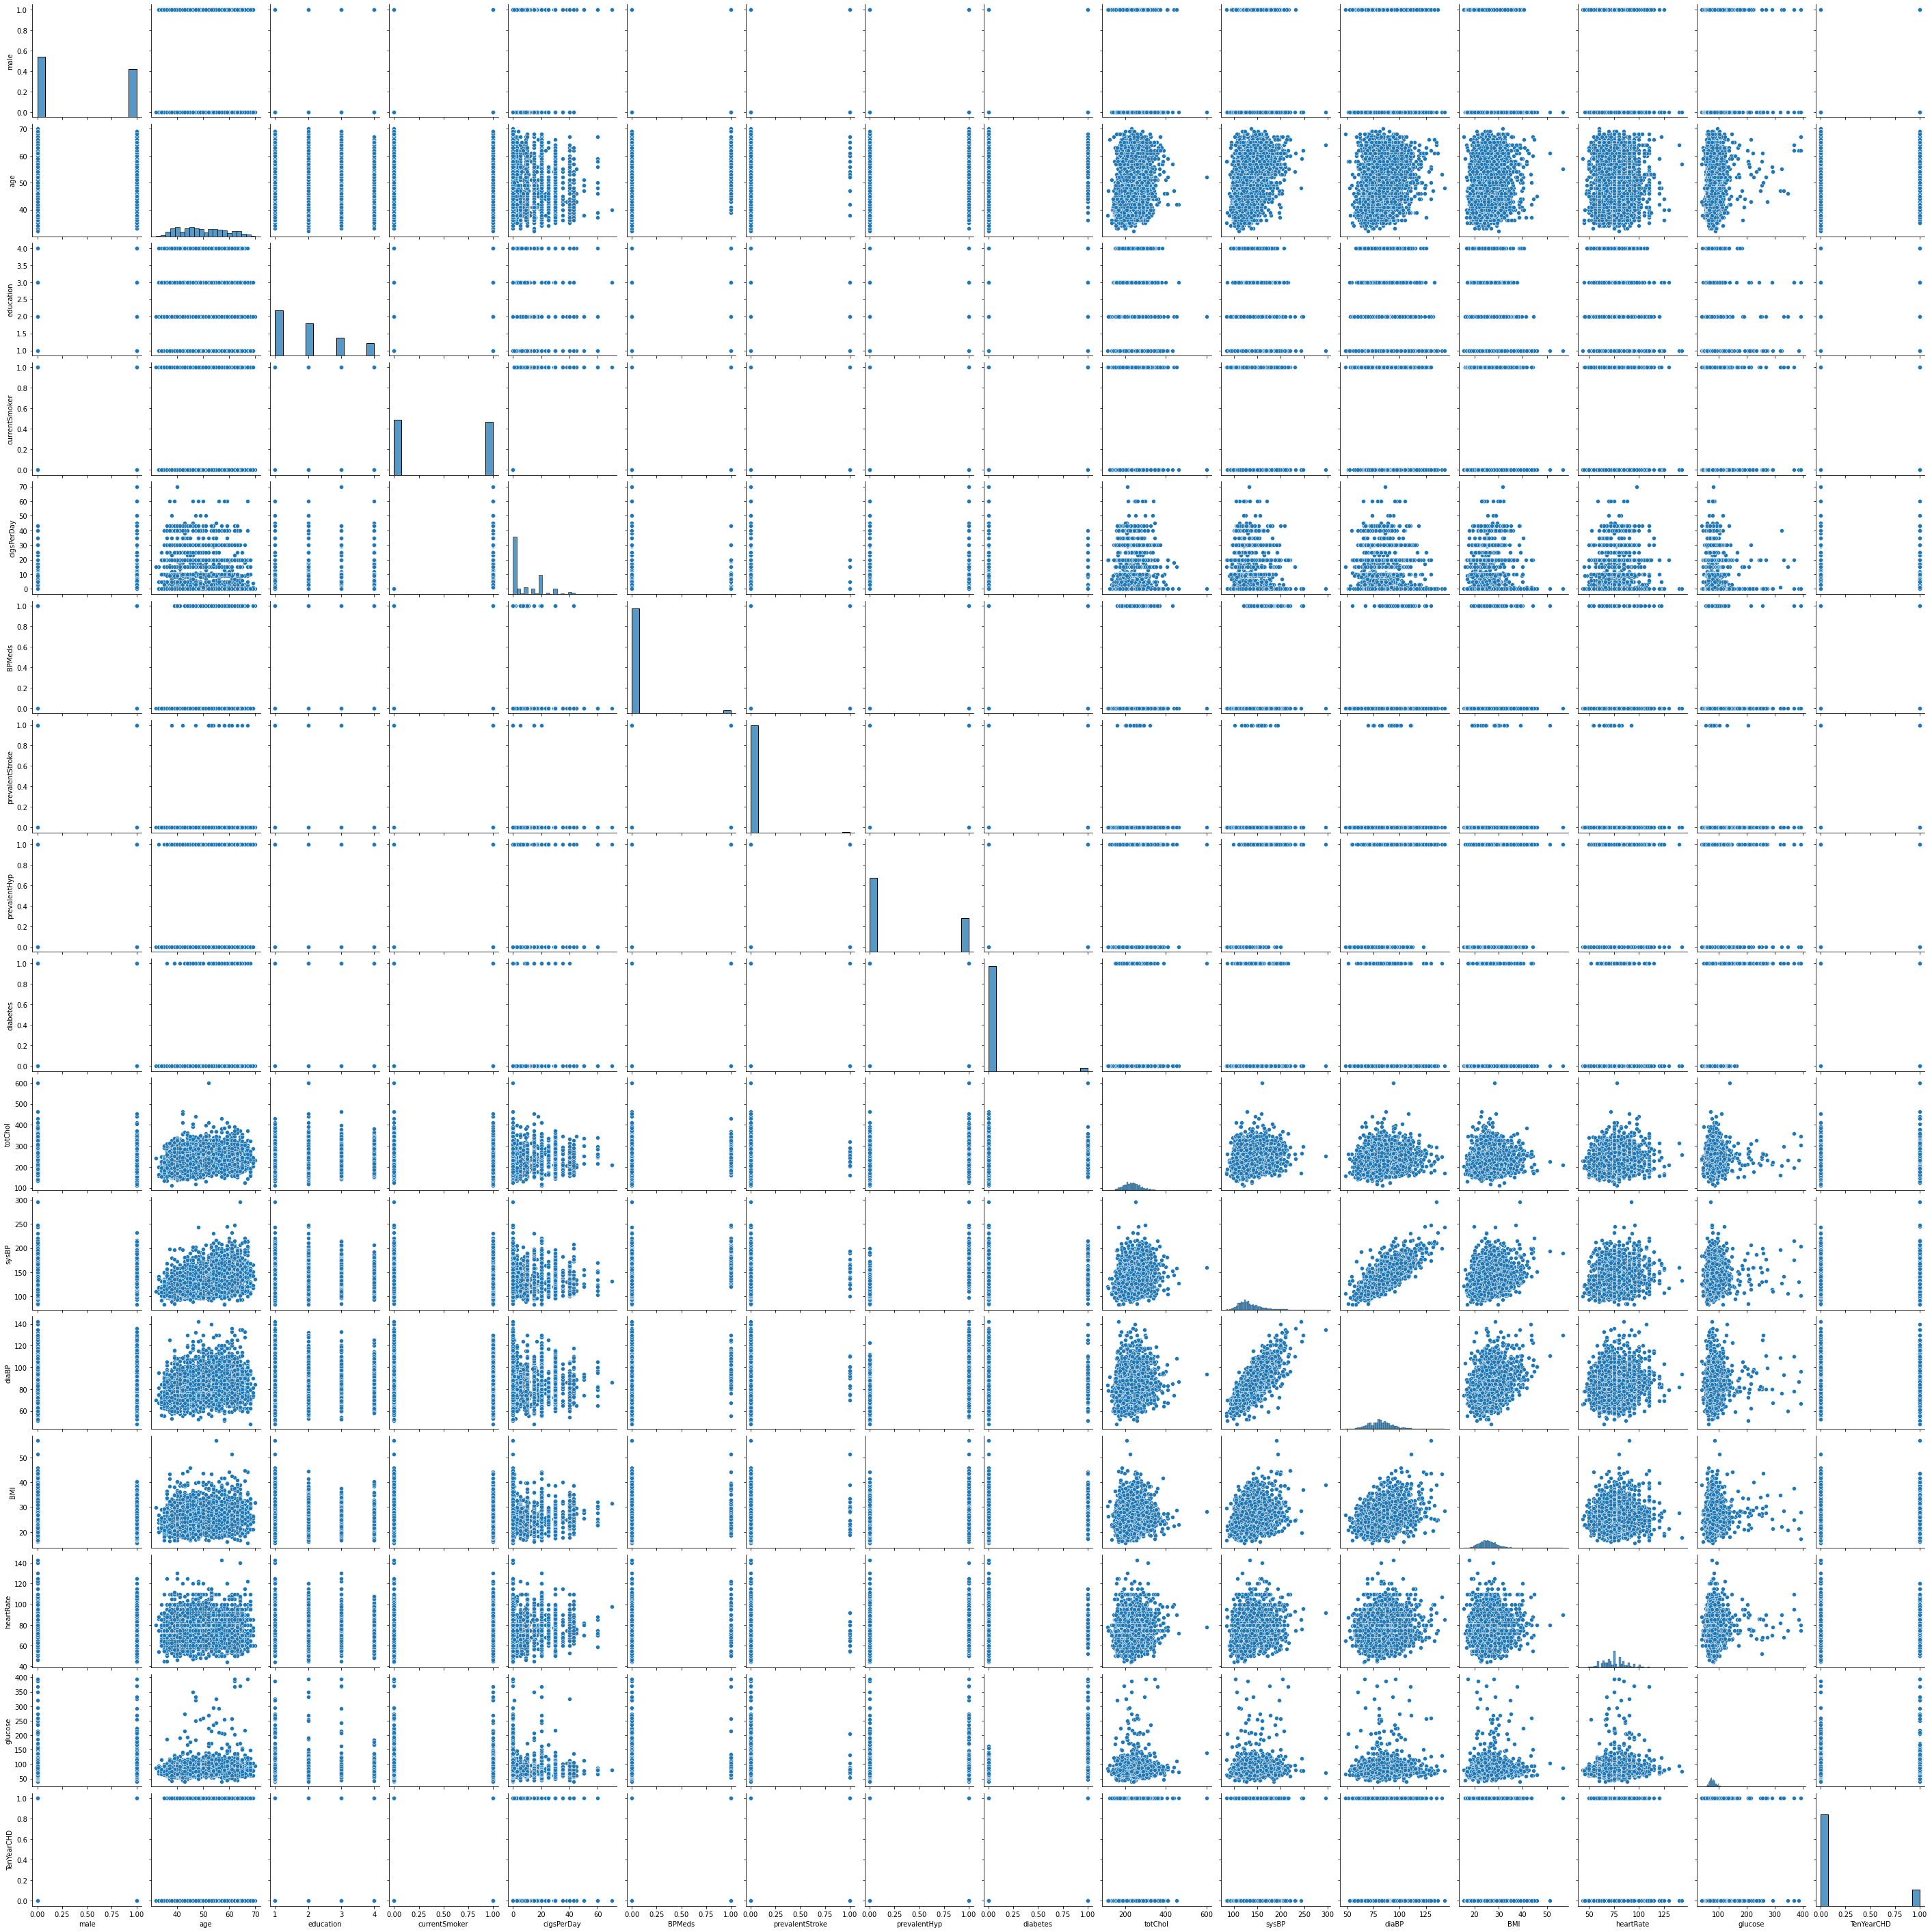

In [46]:
sns.pairplot(data)

<AxesSubplot:ylabel='Frequency'>

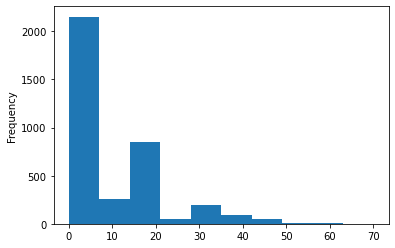

In [50]:
data["cigsPerDay"].plot(kind="hist")

<Figure size 1080x360 with 0 Axes>

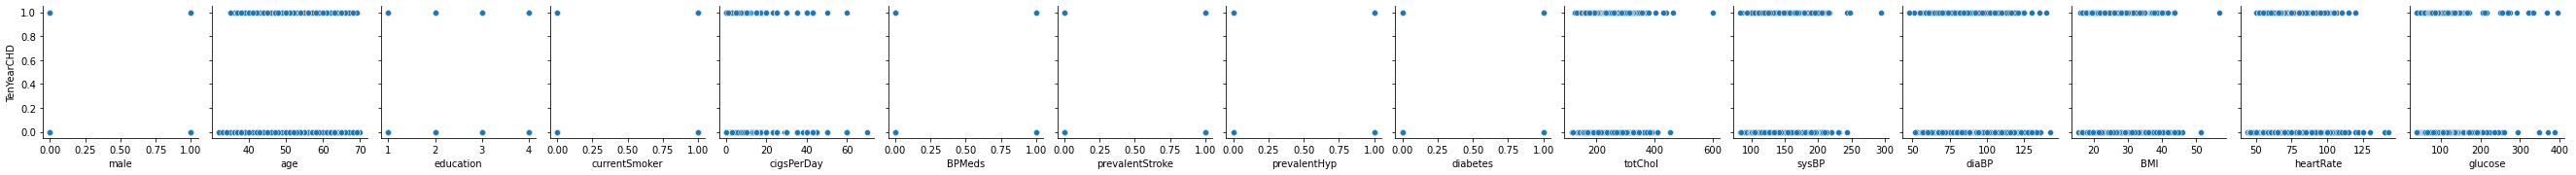

In [60]:
plt.figure(figsize=(15,5))
sns.pairplot(data=data,y_vars=["TenYearCHD"],x_vars=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'])

# Split the data

In [63]:
y=data[["TenYearCHD"]]
x=data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [66]:
x_train.shape

(2559, 15)

In [68]:
y_test.shape

(1097, 1)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(x_train)
Xtest=sc.fit_transform(x_test)

In [73]:
LR=LogisticRegression()
LR.fit(Xtrain,y_train)
yhat=LR.predict(Xtest)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,yhat)
cm

array([[932,  10],
       [141,  14]], dtype=int64)

In [79]:
print(accuracy_score(y_test,yhat))

0.8623518687329079


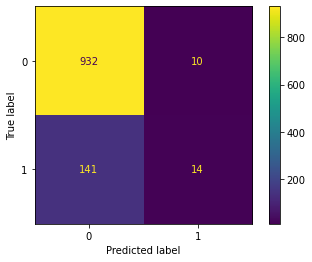

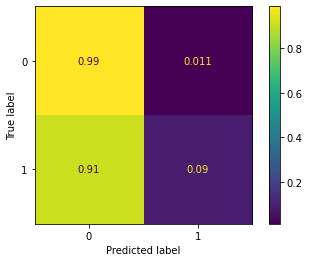

In [90]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=LR ,X=Xtest, y_true=y_test)
plot_confusion_matrix(estimator=LR ,X=Xtest, y_true=y_test,normalize="true")

In [91]:
from sklearn.metrics import plot_precision_recall_curve

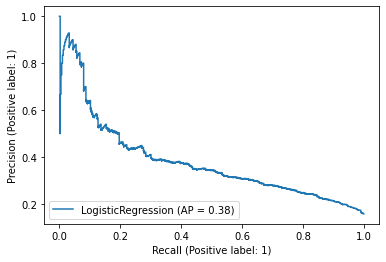

In [93]:
plot_precision_recall_curve(LR,Xtrain,y_train)

In [97]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       942
           1       0.58      0.09      0.16       155

    accuracy                           0.86      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.83      0.86      0.82      1097



In [110]:
val=LR.fit(Xtrain,y_train).predict_proba(Xtest)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [112]:
from sklearn.metrics import roc_curve,auc
FPR,TPR,threshold=roc_curve(y_test,val[:,1])
aucs=auc(FPR,TPR)
print(aucs)

0.717176905691391


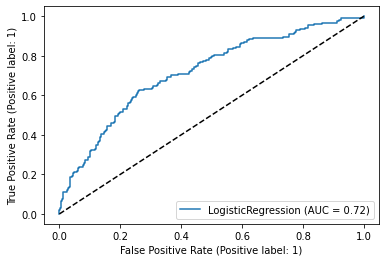

In [96]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,Xtest,y_test)
plt.plot([0,1],[0,1],"k--")

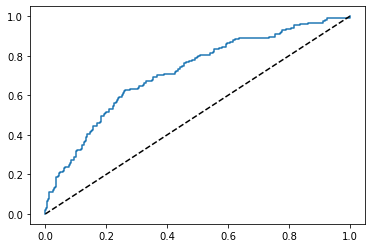

In [115]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],"k--")